In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input
/kaggle/input/UPM_GMS42_7_On_Your_Way_Instrume.wav
/kaggle/input/UPM_BBCPM081_1_I_Stand_In_Silence_Instrumental_Petsas_1094920.wav
/kaggle/input/UPM_BOS1012_24_Pachelbel_Canon_I.wav
/kaggle/input/UPM_GAL180_15_Groovy_Rollin_Inst.wav
/kaggle/input/UPM_BBCPM081_1_I_Stand_In_Silenc.wav
/kaggle/input/UPM_BTV225_10_Almost_Home_Instrumental_Bradley_Sanchez_1198416.wav
/kaggle/input/UPM_BR674_5_A_Seven_Flat_Five_Sharp_Eleven_Vocal_Lead_Fatigue_1134239.wav
/kaggle/input/UPM_ATMOS201_20_At_Peace_Main_Track_Lock_279592.wav
/kaggle/input/UPM_BR674_3_All_Strung_Out_Instrumental_Fatigue_1134235.wav
/kaggle/input/UPM_BBCPM23_9_A_Widows_Memories.wav
/kaggle/input/UPM_BR674_3_All_Strung_Out_Instr.wav
/kaggle/input/UPM_BBCPM82_4_Mountain_Top_Instrumental_Slater_1133516.wav
/kaggle/input/UPM_BOS1012_24_Pachelbel_Canon_Instrumental_Lane_1085290.wav
/kaggle/input/UPM_FCLS23_4_Air_On_A_G_String_M.wav
/kaggle/input/UPM_BTV225_6_Gentle_Peace_Instrumental_Balmforth_Taylor_1198412.wav
/kaggle/inp

In [2]:
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import os
import librosa.display
from scipy.io import wavfile as wav
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
music_list = filenames

In [4]:
hop_length = 1024

In [5]:
sr = 22050

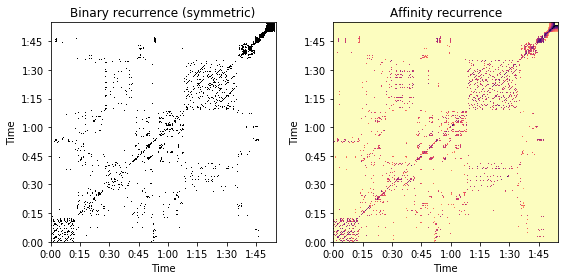

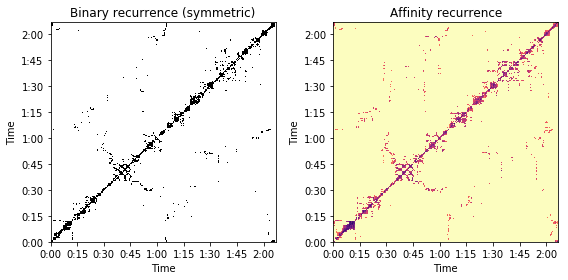

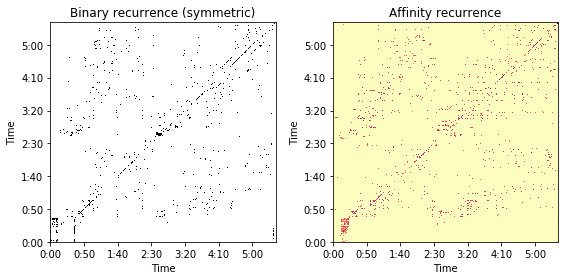

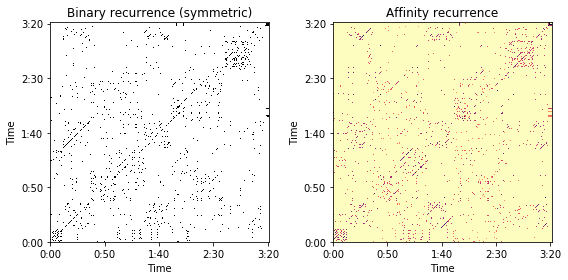

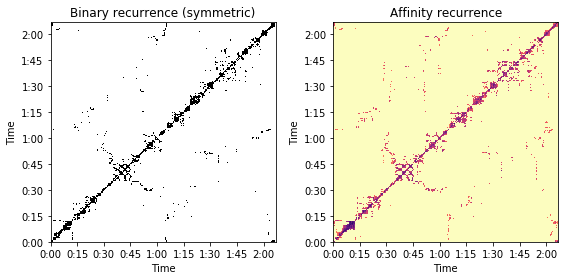

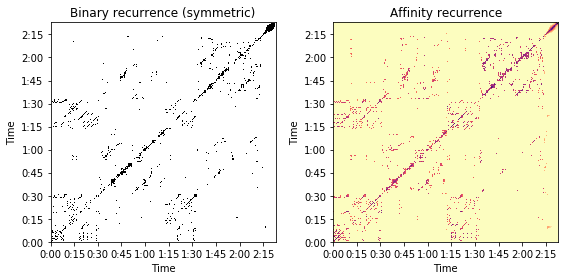

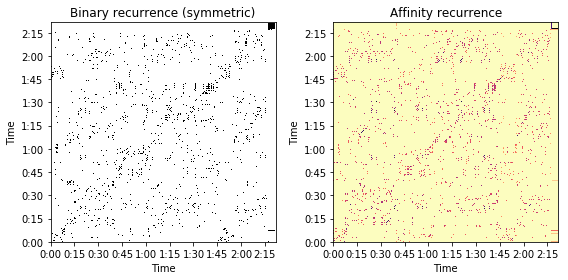

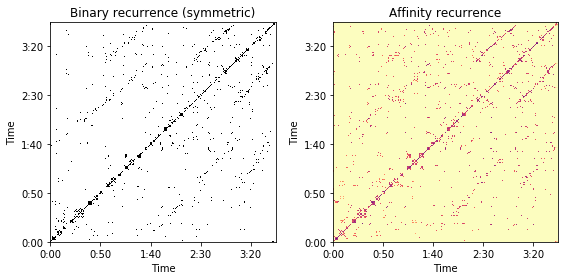

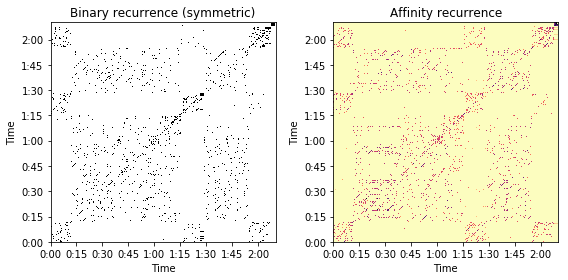

In [6]:
np_music=[]
i=1
for each in music_list:
    if i==10:
        break
    plt.figure(figsize=(8, 4))
    files = '../input/'+each
    audio, sample_rate = librosa.load(files)
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, hop_length=hop_length) # hop_length
    R = librosa.segment.recurrence_matrix(mfcc,sym = True)
    R_aff = librosa.segment.recurrence_matrix(mfcc, mode='affinity')
        
    plt.subplot(1, 2, 1)
    librosa.display.specshow(R, x_axis='time', y_axis='time', hop_length=hop_length)
    plt.title(f'Binary recurrence (symmetric)')
    plt.subplot(1, 2, 2)
#     plt.show()
    librosa.display.specshow(R_aff, x_axis='time', y_axis='time',hop_length=hop_length, cmap='magma_r')
    plt.title(f'Affinity recurrence')
    plt.tight_layout()
    plt.show()
    i+=1
#     np_music.append(audio)

In [7]:
def extract_features(file_name):
    file_path = "../input/" + file_name
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
     
    return mfccs_processed

In [8]:
label_list=[]
i=0
# file = h5py.File('music13.hdf5','w') #change name of file everytime before run
for each in music_list:
#     print(each)
    if i<10:
#         dset = file.create_dataset("Alpha_"+str(i),data=each)
        label_list.append("Alpha")
    if i>=10 and i<22:
#         dset = file.create_dataset("Beta_"+str(i),data = each)
        label_list.append("Beta")
    if i>=22:
#         dset = file.create_dataset("Delta_"+str(i),data = each)
        label_list.append("Delta")
#     print('here')    
    i+=1
label_list  

['Alpha',
 'Alpha',
 'Alpha',
 'Alpha',
 'Alpha',
 'Alpha',
 'Alpha',
 'Alpha',
 'Alpha',
 'Alpha',
 'Beta',
 'Beta',
 'Beta',
 'Beta',
 'Beta',
 'Beta',
 'Beta',
 'Beta',
 'Beta',
 'Beta',
 'Beta',
 'Beta',
 'Delta',
 'Delta',
 'Delta',
 'Delta',
 'Delta',
 'Delta',
 'Delta',
 'Delta',
 'Delta',
 'Delta']

In [9]:
features = []
# Iterate through each sound file and extract the features 
for each in music_list:
    
#     class_label = row["class"]
    data = extract_features(each)
    
    features.append(data)

In [10]:
# Convert into a Panda dataframe 
featuresdf = pd.DataFrame({'feature':features,'class_label':label_list})
featuresdf.head()

,feature,class_label
0,"[-150.00616, 120.26571, 19.965014, 28.980158, ...",Alpha
1,"[-390.26746, 121.46573, -15.238949, 10.384861,...",Alpha
2,"[-167.84712, 116.52125, -28.35301, 41.090885, ...",Alpha
3,"[-186.03665, 117.965294, 0.76414865, 24.522587...",Alpha
4,"[-390.22147, 121.472916, -15.247435, 10.394457...",Alpha


In [11]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())
# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [12]:
# split the dataset 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.1, random_state = 127)

In [13]:
num_labels = yy.shape[1]
# filter_size = def build_model_graph(input_shape=(40,)):
model = Sequential()
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
    # Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
#     return modelmodel = build_model_graph()

In [14]:
num_epochs = 100
num_batch_size = 32
# model = Sequential()
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)

Train on 28 samples, validate on 4 samples
Epoch 1/100
28/28 [==============================] - 1s 45ms/step - loss: 26.2025 - accuracy: 0.3929 - val_loss: 6.1740 - val_accuracy: 0.5000
Epoch 2/100
28/28 [==============================] - 0s 311us/step - loss: 17.0867 - accuracy: 0.3214 - val_loss: 8.1947 - val_accuracy: 0.5000
Epoch 3/100
28/28 [==============================] - 0s 338us/step - loss: 32.0241 - accuracy: 0.2857 - val_loss: 7.7705 - val_accuracy: 0.5000
Epoch 4/100
28/28 [==============================] - 0s 313us/step - loss: 23.1886 - accuracy: 0.3214 - val_loss: 6.6013 - val_accuracy: 0.5000
Epoch 5/100
28/28 [==============================] - 0s 309us/step - loss: 18.0378 - accuracy: 0.5000 - val_loss: 6.0594 - val_accuracy: 0.5000
Epoch 6/100
28/28 [==============================] - 0s 312us/step - loss: 21.2321 - accuracy: 0.3571 - val_loss: 4.7375 - val_accuracy: 0.5000
Epoch 7/100
28/28 [==============================] - 0s 308us/step - loss: 25.5612 - accuracy:

In [15]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))

Training Accuracy: 71.43%
Testing Accuracy: 25.00%
